<h1>Chicago Crimes Data Analytics Exam</h1>

<h2>Analyst: Jovan Allyn L. Diaz</h2>


In [1]:

import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')
sns.set(style='whitegrid', rc={'figure.figsize': (10,6)})


In [2]:


df = pd.read_csv('datasets\\Chicago_Crimes.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()
df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Hour,Weekday
0,13439321,JH237424,2024-04-14,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)",4,0,Sunday
1,13437420,JH234779,2024-04-14,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)",4,0,Sunday
2,13428676,JH224478,2024-04-14,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)",4,0,Sunday
3,13429357,JH225293,2024-04-14,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)",4,0,Sunday
4,13430098,JH226395,2024-04-14,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)",4,0,Sunday


In [39]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
Month                     0
Hour                      0
Weekday                   0
dtype: int64

In [40]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Month                            int32
Hour                             int32
Weekday                         object
dtype: object

In [43]:
df.describe()

,ID,Date,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Hour
count,2.491230e+05,249123,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000,249123.000000,249123.000000
mean,1.358652e+07,2024-10-03 08:31:57.251478528,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845,6.680058,12.521084
min,2.807300e+04,2024-04-14 00:00:00,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567,1.000000,0.000000
25%,1.352322e+07,2024-07-06 13:45:30,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071,4.000000,8.000000
50%,1.361560e+07,2024-09-27 03:00:00,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690,7.000000,13.000000
75%,1.370865e+07,2024-12-28 18:20:00,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233,9.000000,18.000000
max,1.381045e+07,2025-04-12 00:00:00,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531,12.000000,23.000000
std,6.473192e+05,NaN,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875,3.314884,6.843107


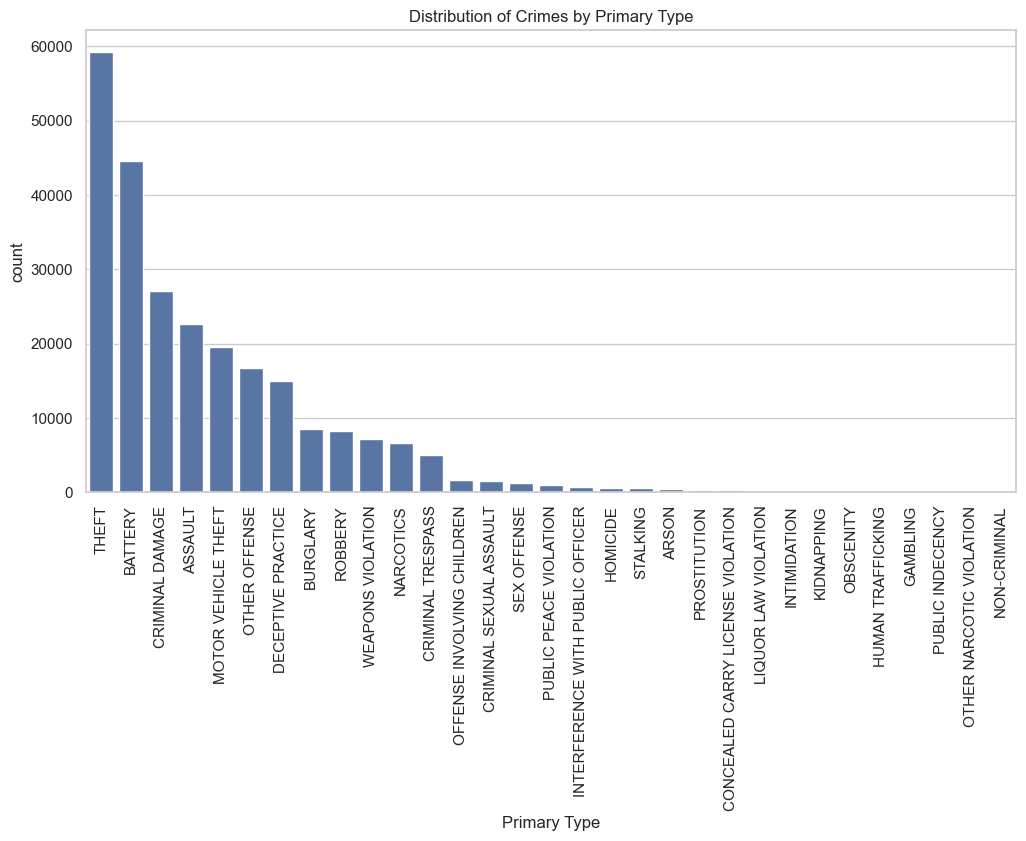

In [3]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Primary Type', order=df['Primary Type'].value_counts().index)
plt.xticks(rotation=90); plt.title('Distribution of Crimes by Primary Type'); plt.show()

<h2>Insight #1 - This shows the distribution of crimes by primary type, revealing that THEFT and BATTERY are the most frequently reported crime categories, accounting for the largest share of total incidents in the dataset.</h2>

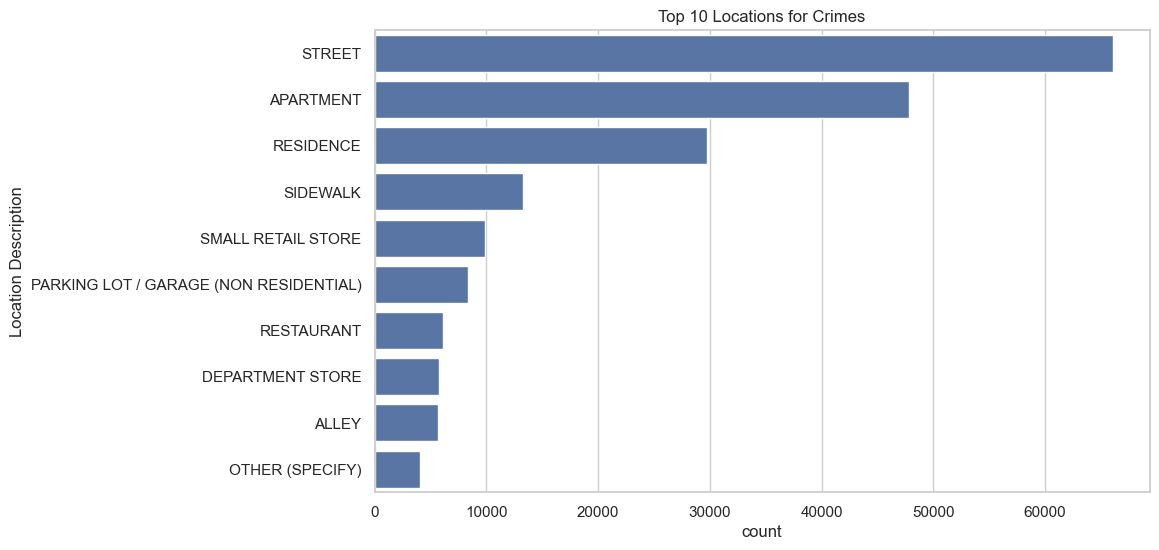

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Location Description', order=df['Location Description'].value_counts().head(10).index)
plt.title('Top 10 Locations for Crimes')
plt.show()

<h2>Insight #2 - This displays the top 10 locations where crimes occur most frequently, with STREET, RESIDENCE, and SIDEWALK being the dominant locations, indicating that both public spaces and private homes are major crime hotspots.</h2>

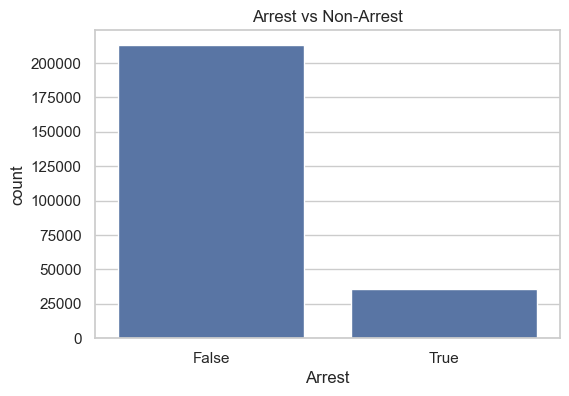

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Arrest')
plt.title('Arrest vs Non-Arrest')
plt.show()

<h2>Insight #3 - This compares the count of incidents that resulted in arrests versus those that did not, showing that the majority of reported crimes do not lead to arrests, highlighting significant gaps in case clearance and enforcement effectiveness.</h2>

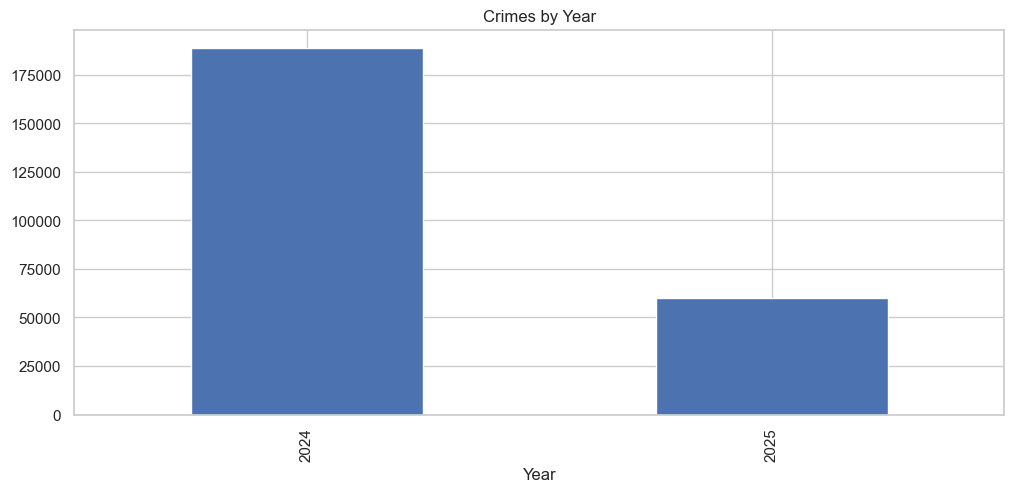

In [6]:
plt.figure(figsize=(12,5))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Crimes by Year')
plt.show()


<h2>Insight #4 - This shows the yearly trend of total reported crimes across the entire dataset period, revealing long-term patterns of increase or decrease.</h2>



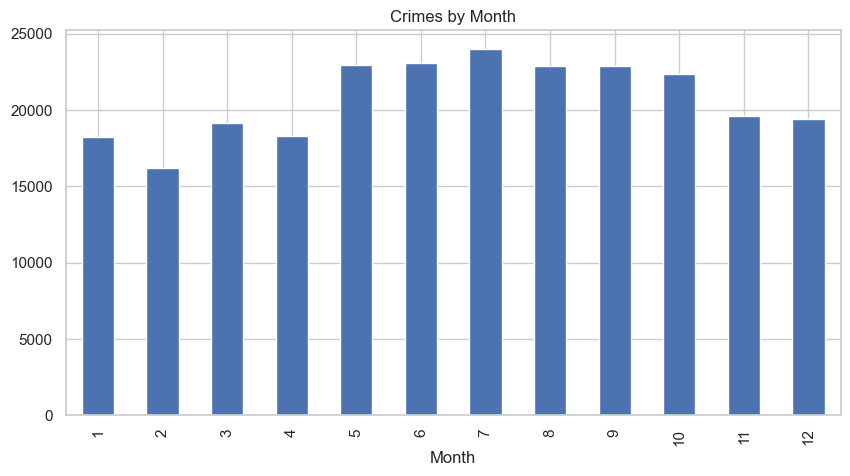

In [7]:
plt.figure(figsize=(10,5))
df['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Crimes by Month')
plt.show()

<h2>Insight #5 - This displays the monthly distribution of crimes throughout the year, showing clear seasonal patterns with crime counts typically peaking during summer months (June-August) and declining during winter months (December-February).</h2>

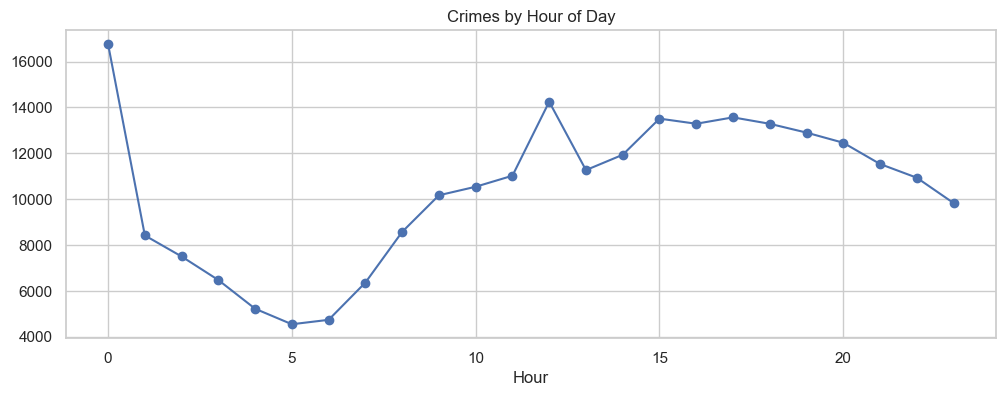

In [8]:
plt.figure(figsize=(12,4))
df['Hour'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Crimes by Hour of Day')
plt.show()

<h2>Insight #6 - This reveals the hourly distribution of crimes throughout a 24-hour period, showing that criminal activity peaks during evening and late-night hours (typically 6 PM to 2 AM) and reaches its lowest point during early morning hours (3 AM to 6 AM).</h2>

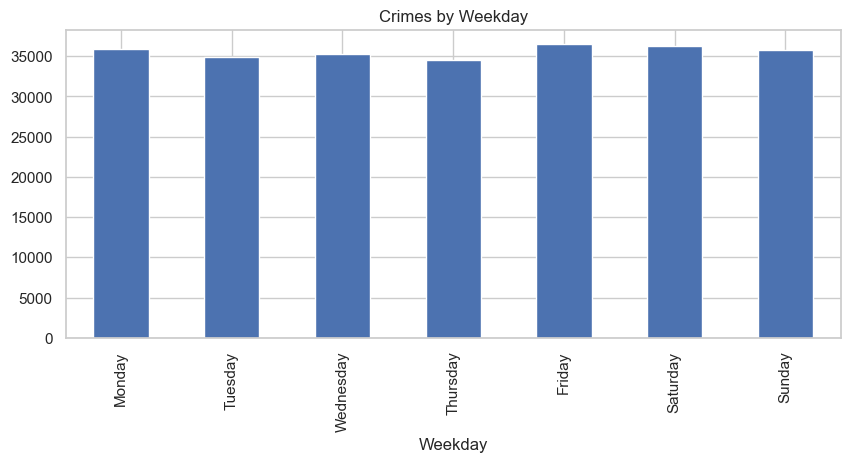

In [9]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
counts = df['Weekday'].value_counts().reindex(order)
plt.figure(figsize=(10,4))
counts.plot(kind='bar')
plt.title('Crimes by Weekday')
plt.show()

<h2>Insight #7 - This shows the distribution of crimes across different days of the week, revealing that weekends (Friday and Saturday) consistently experience higher crime rates compared to weekdays.</h2>


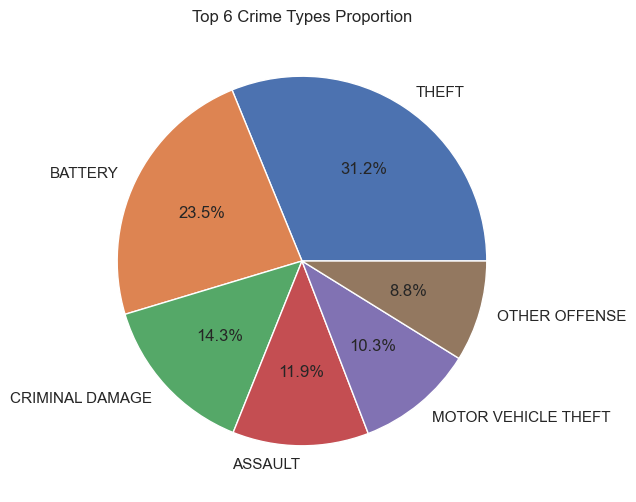

In [10]:
plt.figure(figsize=(6,6))
df['Primary Type'].value_counts().nlargest(6).plot(kind='pie', autopct='%1.1f%%')
plt.ylabel(''); plt.title('Top 6 Crime Types Proportion'); plt.show()

<h2>Insight #8 - This pie chart illustrates the proportion of the top 6 crime types relative to total crimes, showing that these dominant categories account for a disproportionately large percentage of all incidents, indicating where targeted interventions would have maximum impact.</h2>

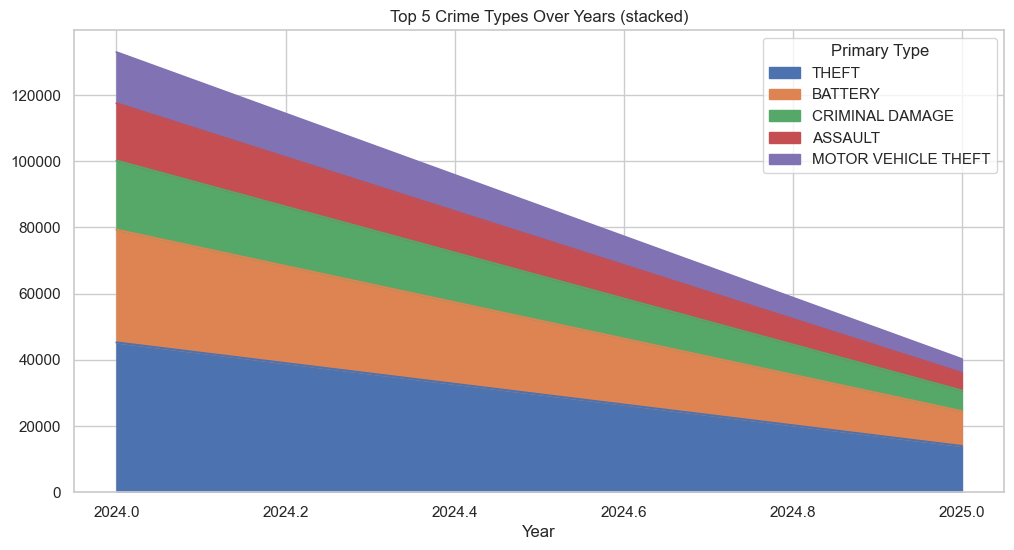

In [11]:
top5 = df['Primary Type'].value_counts().nlargest(5).index
pivot = df[df['Primary Type'].isin(top5)].groupby([df['Date'].dt.year.rename('Year'), 'Primary Type']).size().unstack(fill_value=0)
pivot[top5].plot(kind='area', stacked=True, figsize=(12,6))
plt.title('Top 5 Crime Types Over Years (stacked)')
plt.show()

<h2>Insight #9 - This stacked area chart shows how the composition of the top 5 crime types has evolved over the years, revealing shifts in the relative common occurence of different crime categories and helping identify which types are growing or declining over time.</h2>

In [12]:
geo = df.dropna(subset=['Latitude','Longitude']).head(1000)
m = folium.Map(location=[geo['Latitude'].iloc[0], geo['Longitude'].iloc[0]], zoom_start=11)
HeatMap(geo[['Latitude','Longitude']].values.tolist(), radius=8).add_to(m)
m.save('heatmap_all.html')
m

<h2>Insight #10 - This geographic heatmap visualizes the spatial concentration of crimes across Chicago, revealing distinct hotspots where incidents cluster heavily, typically in commercial corridors, transit hubs, and densely populated neighborhoods.</h2>

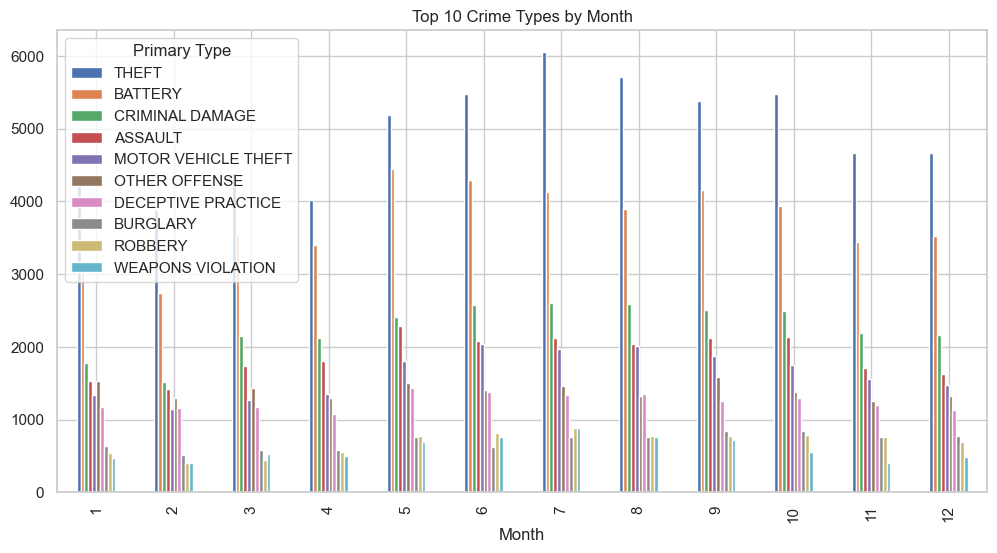

In [13]:
top10 = df['Primary Type'].value_counts().nlargest(10).index
pivot = pd.crosstab(df['Month'], df['Primary Type'])[list(top10)].sort_index()
pivot.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Top 10 Crime Types by Month')
plt.show()

<h2>Insight #11 - This shows how the top 10 crime types vary across different months of the year, revealing that each crime category has unique seasonal patterns, with some peaking in summer while others show different temporal distributions.</h2>

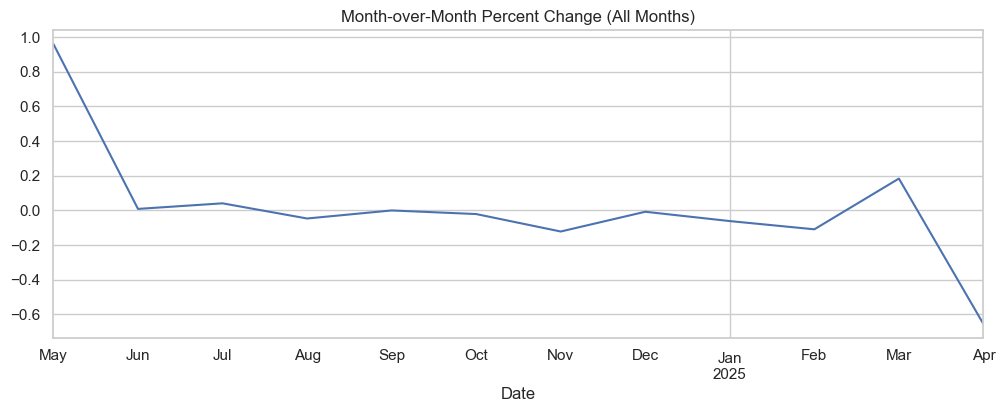

In [14]:
monthly = df.set_index(pd.to_datetime(df['Date'])).resample('M').size()
pct = monthly.pct_change().dropna()
plt.figure(figsize=(12,4)); pct.plot(); plt.title('Month-over-Month Percent Change (All Months)'); plt.show()


<h2>Insight #12 - This displays the month-over-month percent change in total crime incidents, highlighting periods of sharp increases or decreases that may indicate the impact of major events.</h2>

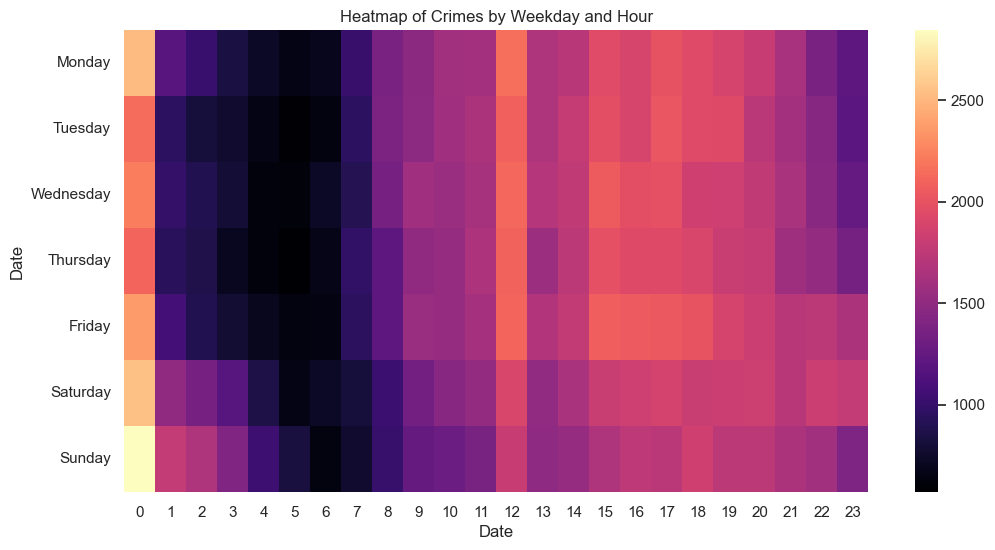

In [15]:
pivot = df.groupby([df['Date'].dt.day_name(), df['Date'].dt.hour]).size().unstack(fill_value=0)
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot = pivot.reindex(order)
plt.figure(figsize=(12,6)); sns.heatmap(pivot, cmap='magma'); plt.title('Heatmap of Crimes by Weekday and Hour'); plt.show()

<h2>Insight #13 - This shows crime intensity by combining day of the week and hour of day, revealing that Friday and Saturday nights represent the highest-risk time periods for criminal activity.</h2>


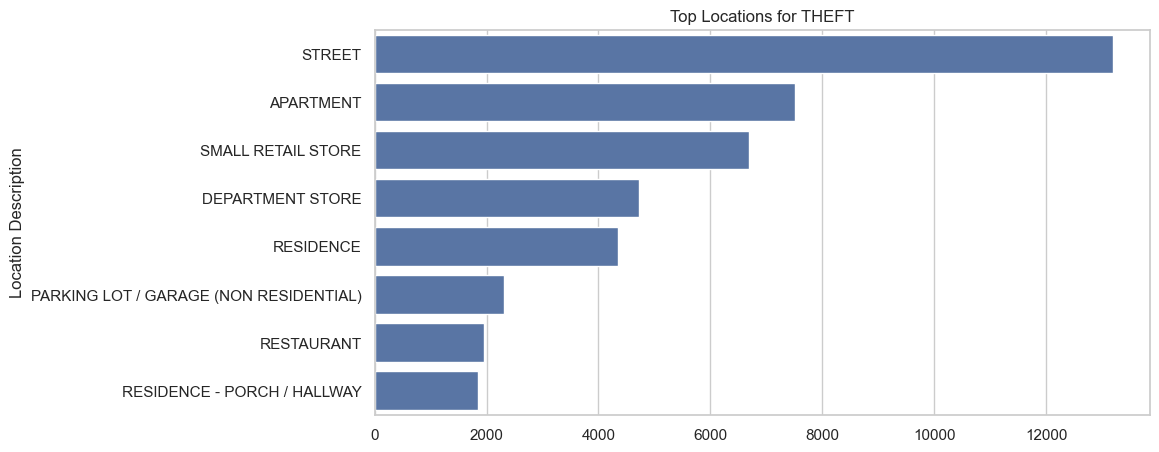

In [16]:
thefts = df[df['Primary Type']=='THEFT']['Location Description'].value_counts().nlargest(8)
plt.figure(figsize=(10,5)); sns.barplot(y=thefts.index, x=thefts.values); plt.title('Top Locations for THEFT'); plt.show()


<h2>Insight #14 - This focuses specifically on THEFT incidents, showing the top locations where theft occurs most frequently, such as streets, parking lots, retail establishments, and public transportation areas.</h2>

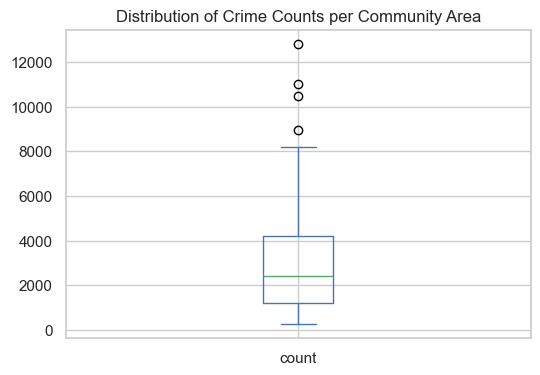

In [17]:
counts = df['Community Area'].value_counts(); plt.figure(figsize=(6,4)); counts.plot(kind='box'); plt.title('Distribution of Crime Counts per Community Area'); plt.show()

<h2>Insight #15 - This boxplot shows the distribution of crime counts across different community areas, revealing significant disparity with some areas experiencing extremely high incident counts while others remain relatively low.</h2>

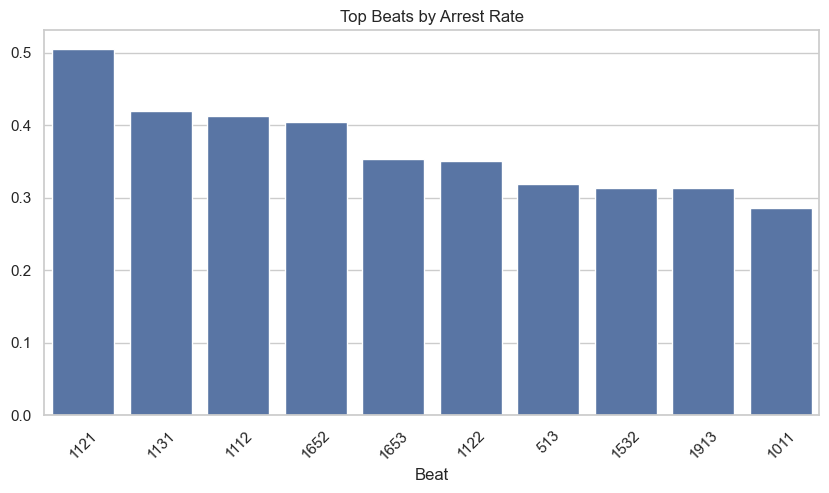

In [18]:
rates = df.groupby('Beat')['Arrest'].mean().sort_values(ascending=False).head(10); plt.figure(figsize=(10,5)); sns.barplot(x=rates.index.astype(str), y=rates.values); plt.xticks(rotation=45); plt.title('Top Beats by Arrest Rate'); plt.show()

<h2>Insight #16 - This displays police beats ranked by their arrest rates, showing that some beats achieve significantly higher arrest rates than others, which may reflect differences in crime types, investigative capacity, or policing effectiveness.</h2>


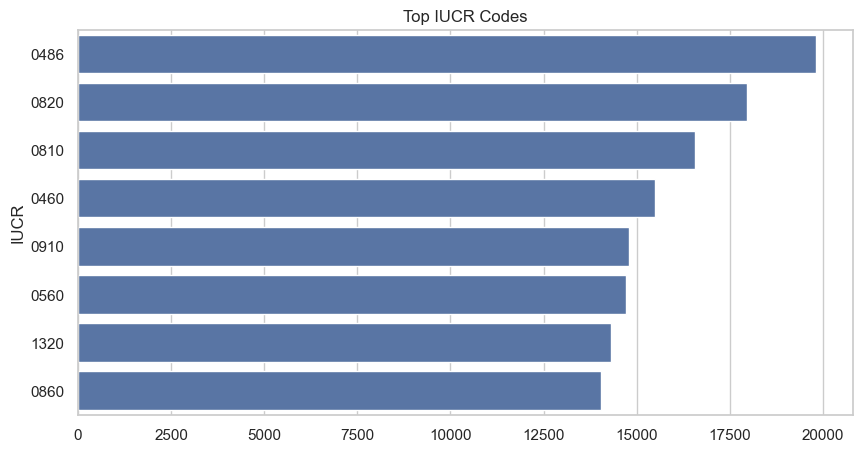

In [19]:
iucr_counts = df['IUCR'].value_counts().nlargest(8); plt.figure(figsize=(10,5)); sns.barplot(y=iucr_counts.index, x=iucr_counts.values); plt.title('Top IUCR Codes'); plt.show()

<h2>Insight #17 - This shows the most frequently occurring IUCR (Illinois Uniform Crime Reporting) codes, identifying the specific legal classifications of crimes that appear most often and therefore require the most officer training and specialized resources.</h2>


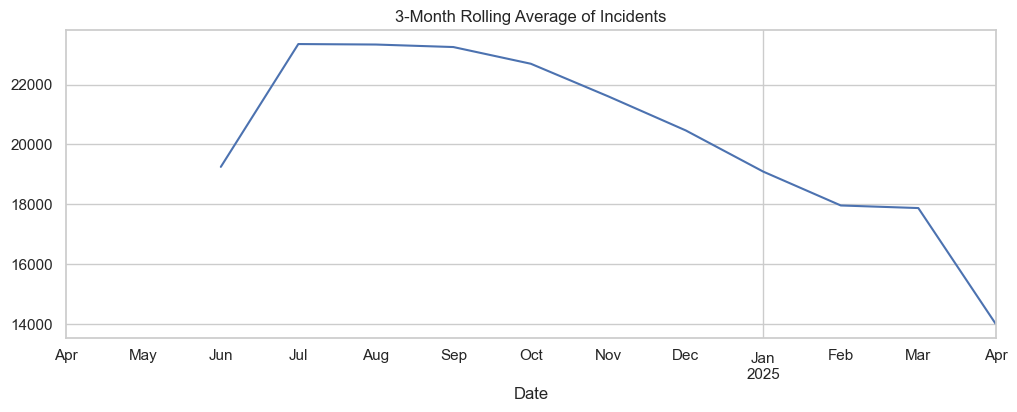

In [20]:
ts = df.set_index(pd.to_datetime(df['Date'])).resample('M').size(); rolling = ts.rolling(3).mean(); plt.figure(figsize=(12,4)); rolling.plot(); plt.title('3-Month Rolling Average of Incidents'); plt.show()

<h2>Insight #18 - This displays a 3-month rolling average of total incidents, smoothing out short-term fluctuations to reveal the underlying trend direction and helping distinguish between temporary spikes and sustained changes in crime levels.</h2>

In [21]:
pairs = df.groupby(['Primary Type','Location Description']).size().nlargest(10).reset_index(name='count'); pairs

,Primary Type,Location Description,count
0,BATTERY,APARTMENT,14580
1,MOTOR VEHICLE THEFT,STREET,14550
2,THEFT,STREET,13185
3,CRIMINAL DAMAGE,STREET,10334
4,THEFT,APARTMENT,7513
5,BATTERY,RESIDENCE,6769
6,THEFT,SMALL RETAIL STORE,6680
7,BATTERY,STREET,6578
8,ASSAULT,APARTMENT,5746
9,OTHER OFFENSE,APARTMENT,5157


<h2>Insight #19 - This identifies the most common crime type and location description pairs (example, "THEFT at STREET" or "BATTERY at RESIDENCE").</h2>

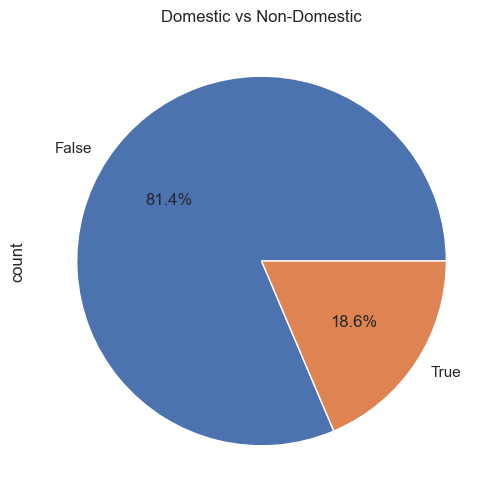

In [22]:
plt.figure(figsize=(6,6)); df['Domestic'].value_counts().plot(kind='pie', autopct='%1.1f%%'); plt.title('Domestic vs Non-Domestic'); plt.show()

<h2>Insight #20 - This pie chart shows the proportion of crimes classified as domestic incidents versus non-domestic, revealing that a significant share of incidents occur within households and require social service interventions rather than traditional enforcement approaches.</h2>

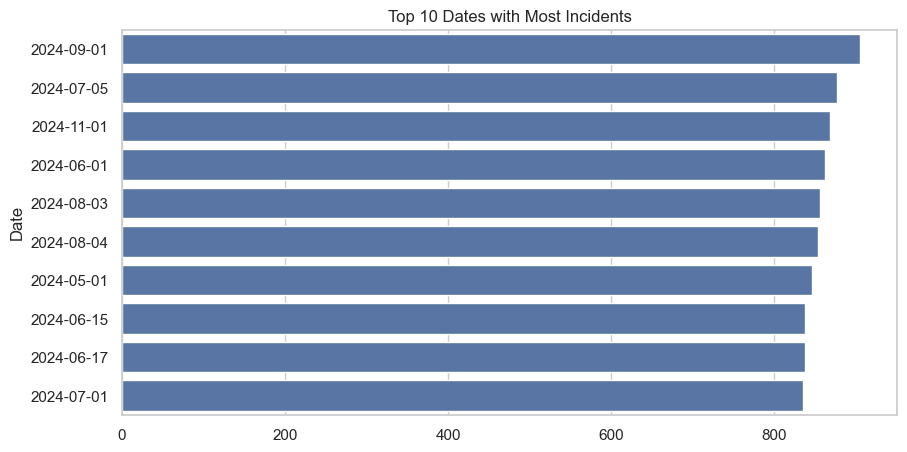

In [23]:
top_dates = df['Date'].dt.date.value_counts().nlargest(10); plt.figure(figsize=(10,5)); sns.barplot(y=top_dates.index.astype(str), x=top_dates.values); plt.title('Top 10 Dates with Most Incidents'); plt.show()

<h2>Insight #21 - This displays the top 10 individual dates with the highest incident counts, often corresponding to holidays, major public events, or other special circumstances that create temporary spikes.</h2>

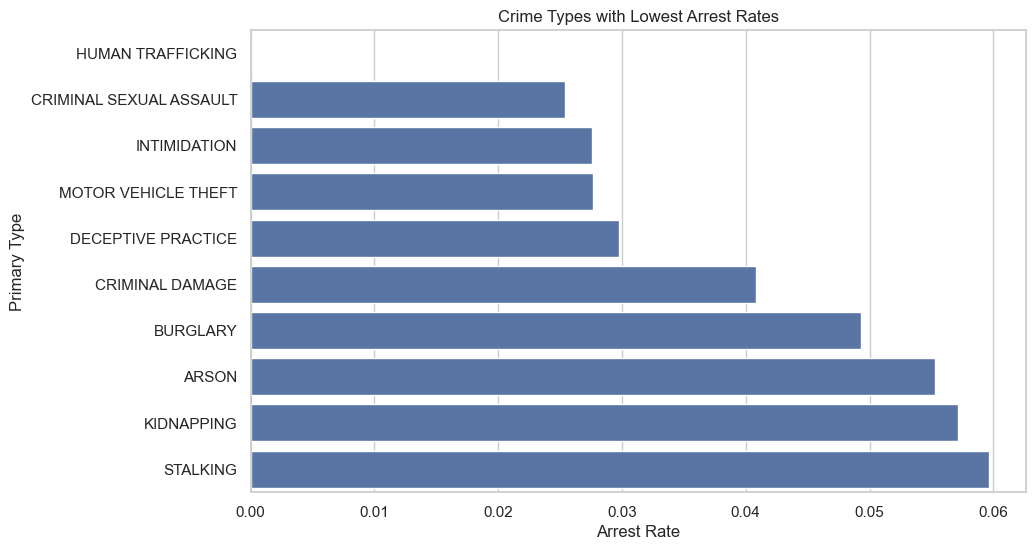

In [24]:
low_rates = df.groupby('Primary Type')['Arrest'].mean().sort_values().head(10); plt.figure(figsize=(10,6)); sns.barplot(y=low_rates.index, x=low_rates.values); plt.xlabel('Arrest Rate'); plt.title('Crime Types with Lowest Arrest Rates'); plt.show()

<h2>Insight #22 - This shows crime types with the lowest arrest rates, identifying categories that are particularly difficult to solve due to lack of evidence, witness cooperation, or investigative challenges, and therefore require enhanced forensic capabilities or alternative approaches.</h2>

In [25]:
top6 = df['Primary Type'].value_counts().nlargest(6).index; ct = pd.crosstab(df['Month'], df['Primary Type'])[list(top6)]; ct

Primary Type,THEFT,BATTERY,CRIMINAL DAMAGE,ASSAULT,MOTOR VEHICLE THEFT,OTHER OFFENSE
Month,,,,,,
1,4279,3028,1774,1528,1332,1537
2,3876,2746,1523,1419,1149,1290
3,4391,3552,2149,1736,1269,1438
4,4024,3405,2125,1800,1356,1294
5,5194,4447,2405,2290,1810,1497
6,5482,4292,2577,2075,2045,1404
7,6053,4137,2598,2122,1977,1456
8,5706,3900,2590,2042,2011,1320
9,5379,4163,2507,2123,1869,1588


<h2>Insight #23 - This crosstab table provides a detailed monthly breakdown for the top 6 crime types.</h2>


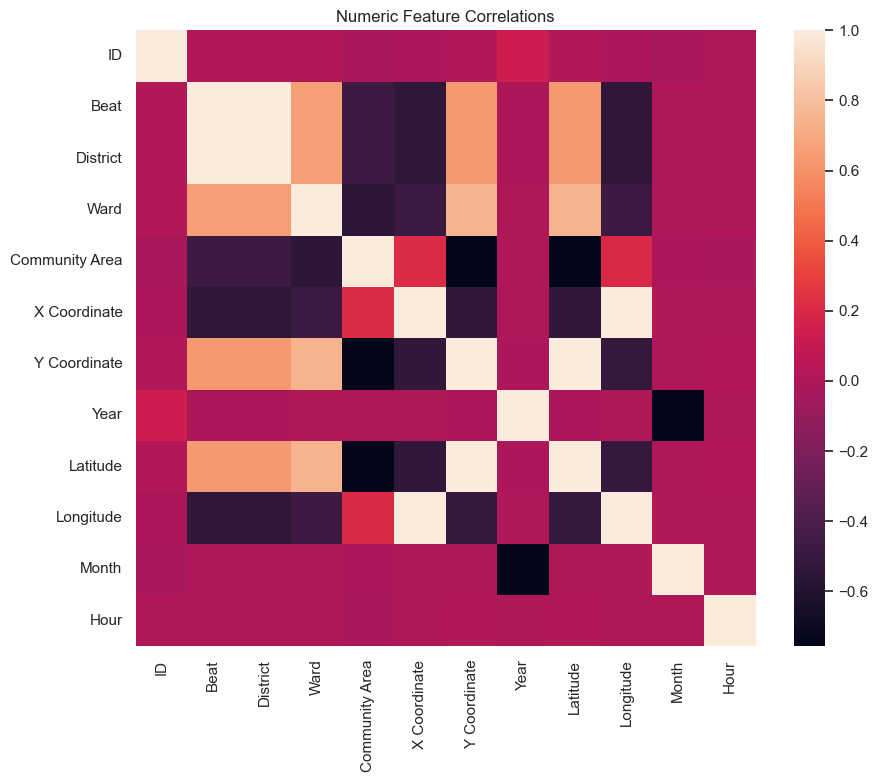

In [26]:
num = df.select_dtypes(include='number').dropna(axis=1, how='all'); plt.figure(figsize=(10,8)); sns.heatmap(num.corr(), annot=False); plt.title('Numeric Feature Correlations'); plt.show()

<h2>Insight #24 - This shows relationships between numeric features in the dataset, revealing which variables tend to move together.</h2>


In [27]:
weekly = df.set_index(pd.to_datetime(df['Date'])).resample('W').size(); pct_change = weekly.pct_change().dropna().nlargest(10); pct_change

Date
2024-04-21    5.359626
2025-02-02    0.186163
2024-12-08    0.134658
2025-03-16    0.098431
2024-07-07    0.094304
2024-09-01    0.092145
2024-05-19    0.057974
2024-06-23    0.054420
2024-11-03    0.053660
2025-01-05    0.048551
dtype: float64

<h2>Insight #25 - This identifies the weeks with the largest percent increases in crime compared to the previous week, highlighting potential emerging hotspots or unusual circumstances that warrant immediate investigation and possible rapid response.</h2>


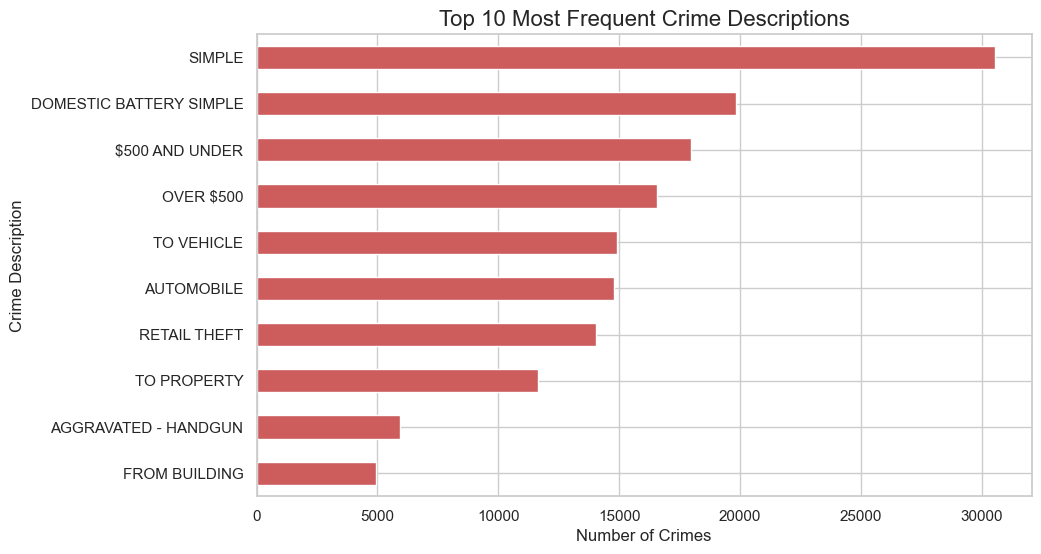

In [44]:
description_counts = df['Description'].value_counts().head(10)
plt.figure(figsize=(10,6))
description_counts.sort_values().plot(kind='barh', color='indianred')
plt.title("Top 10 Most Frequent Crime Descriptions", fontsize=16)
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Description")
plt.show()


<h2>Insight #26 - This shows the most frequently reported crime descriptions in Chicago, highlighting that offenses such as “BATTERY,” “THEFT,” and “CRIMINAL DAMAGE” dominate police records. This reveals that crimes are often concentrated around personal confrontations, property-related incidents, and vandalism, giving a clear picture of the most common threats faced by communities.</h2>


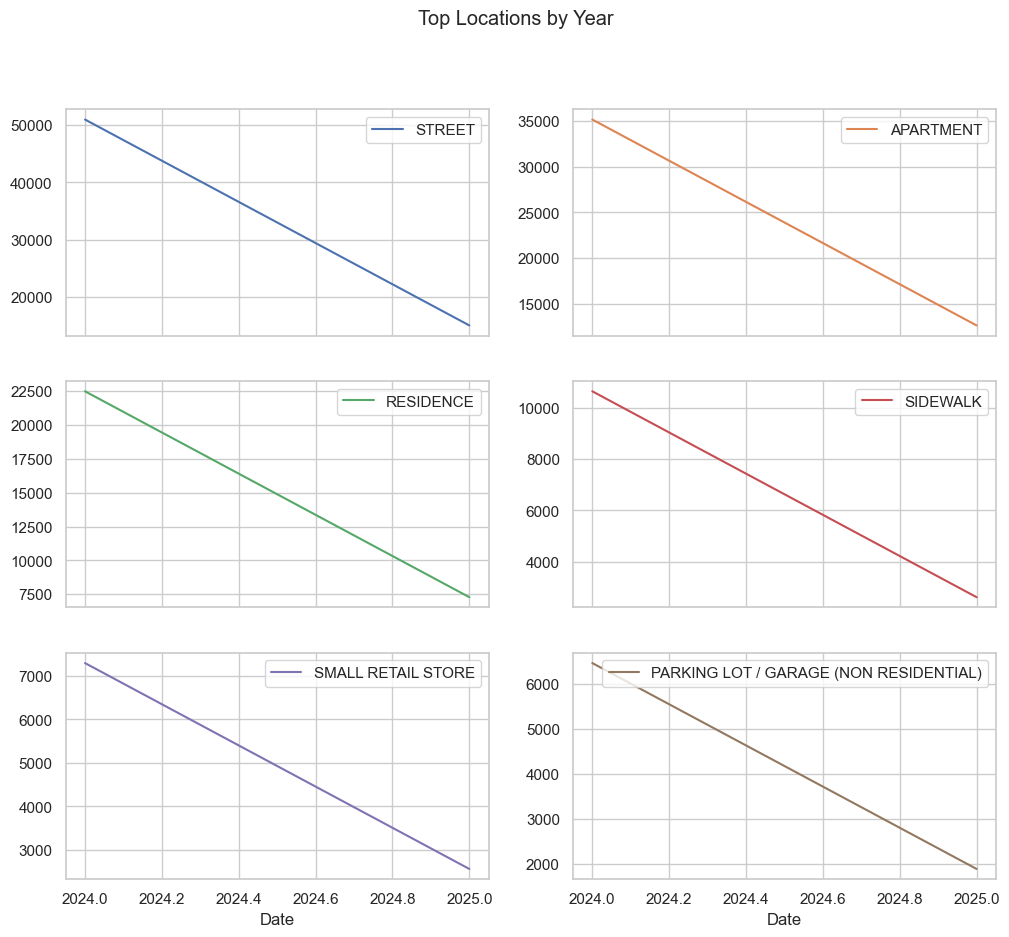

In [29]:
toplocs = df['Location Description'].value_counts().nlargest(6).index; pivot = df[df['Location Description'].isin(toplocs)].groupby([df['Date'].dt.year,'Location Description']).size().unstack(fill_value=0); pivot[toplocs].plot(subplots=True, layout=(3,2), figsize=(12,10), sharex=True); plt.suptitle('Top Locations by Year'); plt.show()


<h2>Insight #27 - This displays small multiple charts showing yearly trends for each of the top 6 location types separately, enabling visual comparison to identify which locations are improving or worsening over time and evaluate place-based intervention effectiveness.</h2>


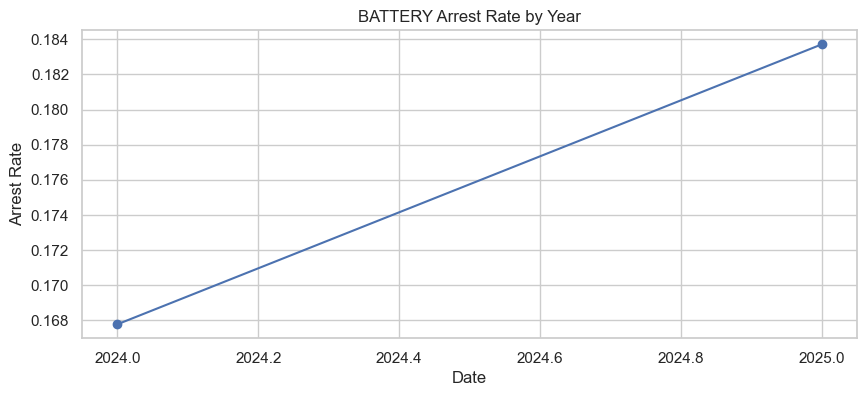

In [30]:
battery_arrest = df[df['Primary Type']=='BATTERY'].groupby(df['Date'].dt.year)['Arrest'].mean(); plt.figure(figsize=(10,4)); battery_arrest.plot(marker='o'); plt.title('BATTERY Arrest Rate by Year'); plt.ylabel('Arrest Rate'); plt.show()


<h2>Insight #28 - This shows the arrest rate specifically for BATTERY incidents tracked over multiple years, revealing whether investigative effectiveness for this major violent crime category is improving, declining, or remaining stable over time.</h2>

In [31]:
arrest_geo = df[df['Arrest']==True].dropna(subset=['Latitude','Longitude']).head(1000); m2 = folium.Map(location=[arrest_geo['Latitude'].iloc[0], arrest_geo['Longitude'].iloc[0]], zoom_start=11); HeatMap(arrest_geo[['Latitude','Longitude']].values.tolist(), radius=8).add_to(m2); m2.save('heatmap_arrests.html'); m2


<h2>Insight #29 - This geographic heatmap focuses specifically on incidents that resulted in arrests, revealing where enforcement activity is concentrated and allowing comparison with the overall incident heatmap to identify gaps where crimes occur but arrests are low.</h2>

In [32]:
top10 = df['Primary Type'].value_counts().nlargest(10).index; table = pd.crosstab(df['Community Area'], df['Primary Type'])[list(top10)]; table.head()

Primary Type,THEFT,BATTERY,CRIMINAL DAMAGE,ASSAULT,MOTOR VEHICLE THEFT,OTHER OFFENSE,DECEPTIVE PRACTICE,BURGLARY,ROBBERY,WEAPONS VIOLATION
Community Area,,,,,,,,,,
1.0,1158,761,414,336,284,236,227,113,104,45
2.0,854,654,395,279,317,241,304,110,88,21
3.0,1400,839,353,388,234,189,302,186,98,40
4.0,581,284,226,145,141,101,162,99,32,9
5.0,385,138,156,62,120,80,166,105,28,5



<h2>Insight #30 - This crosstab table shows how the top 10 crime types are distributed across different community areas, revealing the unique crime profile of each neighborhood.</h2>.

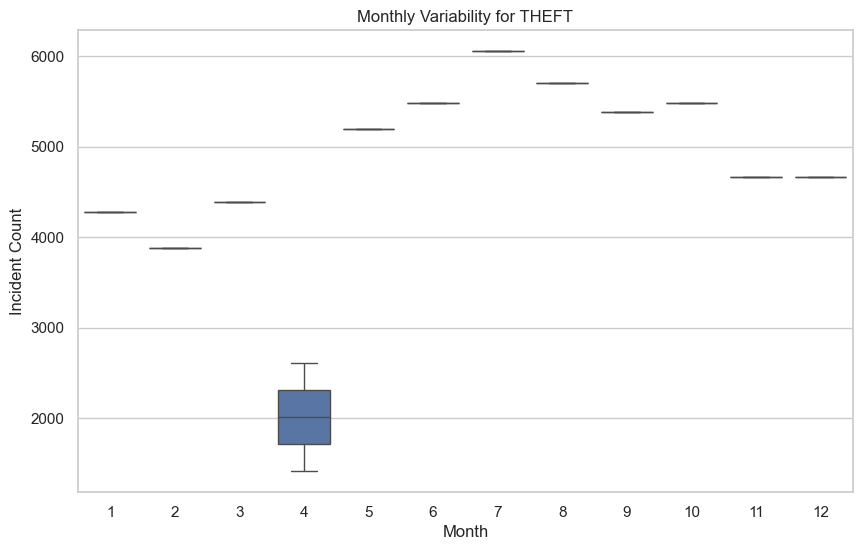

In [33]:
most_common = df['Primary Type'].value_counts().idxmax(); monthly_counts = df[df['Primary Type']==most_common].groupby([df['Date'].dt.year.rename('Year'), df['Date'].dt.month.rename('Month')]).size().reset_index(name='Count'); plt.figure(figsize=(10,6)); sns.boxplot(x='Month', y='Count', data=monthly_counts); plt.title('Monthly Variability for '+most_common); plt.xlabel('Month'); plt.ylabel('Incident Count'); plt.show()

<h2>Insight #31 - This displays the monthly variability for the single most common crime type in the dataset, showing the range of incident counts across different months and revealing which months consistently experience higher or lower activity for this dominant offense.</h2>

In [34]:
top5 = df['Primary Type'].value_counts().nlargest(5).index; table5 = df[df['Primary Type'].isin(top5)].groupby([df['Date'].dt.year,'Primary Type']).size().unstack(fill_value=0); table5

Primary Type,ASSAULT,BATTERY,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,THEFT
Date,,,,,
2024,17298,34052,20869,15422,45239
2025,5317,10527,6225,4182,13962


<h2>Insight #32 - This table compares annual counts for the top 5 crime types side by side over multiple years, enabling year-to-year comparison to assess which categories are being successfully reduced and which remain persistent or are growing problems.</h2>

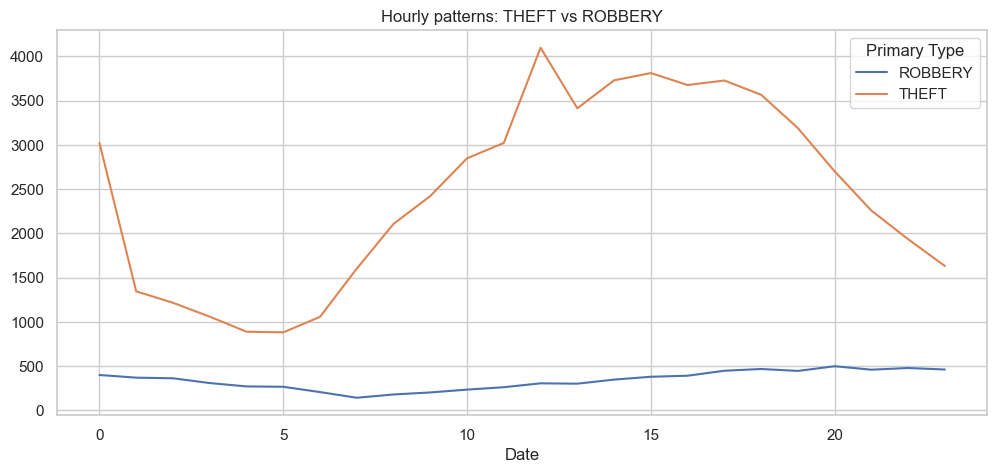

In [35]:
pivot_hr = df[df['Primary Type'].isin(['THEFT','ROBBERY'])].groupby([df['Date'].dt.hour,'Primary Type']).size().unstack(fill_value=0); pivot_hr.plot(figsize=(12,5)); plt.title('Hourly patterns: THEFT vs ROBBERY'); plt.show()

<h2>Insight #33 - This line chart compares the hourly patterns of THEFT versus ROBBERY throughout the day, revealing that these two property crimes have different peak times, with robbery typically concentrated at night while theft shows a more distributed pattern.</h2>


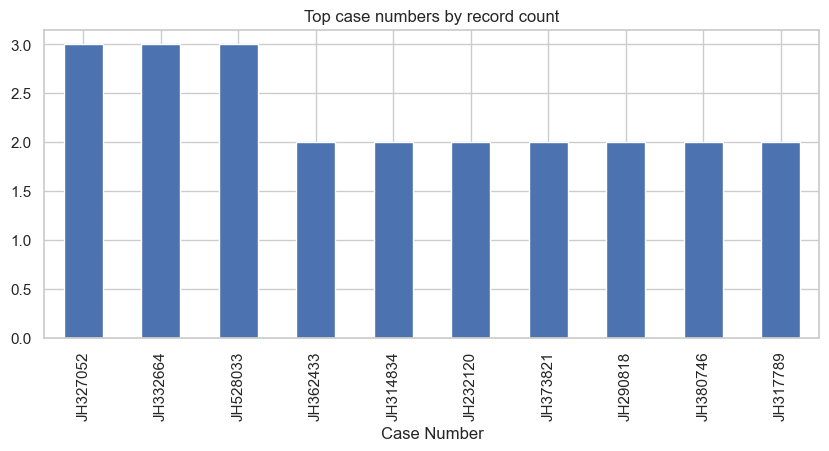

In [36]:
case_counts = df['Case Number'].value_counts().nlargest(10); plt.figure(figsize=(10,4)); case_counts.plot(kind='bar'); plt.title('Top case numbers by record count'); plt.show()

<h2>Insight #34 - This shows case numbers that appear most frequently in the dataset, which may indicate multiple records associated with single investigations, follow-up reports, or potential data duplication issues.</h2>


In [37]:
summary = {}
summary['most_common_type'] = df['Primary Type'].value_counts().idxmax()
summary['most_common_count'] = int(df['Primary Type'].value_counts().max())
summary['earliest_year'] = int(df['Date'].dt.year.min())
summary['latest_year'] = int(df['Date'].dt.year.max())
summary['records_with_geo'] = int(df.dropna(subset=['Latitude','Longitude']).shape[0])
summary['overall_arrest_rate'] = float(df['Arrest'].mean())
print(summary)

{'most_common_type': 'THEFT', 'most_common_count': 59201, 'earliest_year': 2024, 'latest_year': 2025, 'records_with_geo': 249033, 'overall_arrest_rate': 0.14451495847432794}


<h2>Insight #35 - This provides key summary statistics including the most common crime type and its frequency, the temporal range of the dataset, the number of records with geographic coordinates, and the overall arrest rate.</h2>